# Import the Libraries

In [24]:
import numpy as np 

from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs 

import matplotlib.pyplot as plt 

# Set up random dataset with n_samples, the given centers and standard deviation of the clusters

In [25]:
#make_blobs() : Generate isotropic Gaussian blobs for clustering. Create random data and store in feature matrix X and response vector y.


#n_samples : It is the total number of points equally divided among clusters

#centers : The number of centers to generate, or the fixed center locations

#cluster_std : The standard deviation of the clusters

X, y = make_blobs(n_samples = 2500, centers= [[4,3], [2,-1], [-1,4]], cluster_std = 0.5)

# Display the scatter plot of the randomly generated data


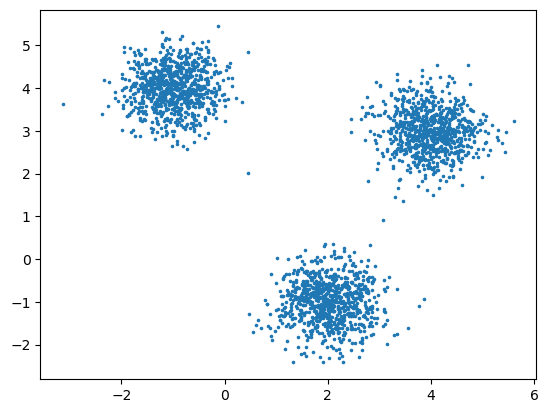

In [26]:
#scatter(): A scatter plot of y vs. x with varying marker size and/or color

#X[:,0] : first data column

#X[:,1] : second data column

#s : size

#marker : shape and marker style

plt.scatter(X[:,0],X[:,1], s=10,marker=".")

#show a plot

plt.show()

# Normalizing over the standard deviation


In [27]:
# Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

# Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler 

X = StandardScaler().fit_transform(X)

# Set up DBSCAN 

In [28]:
# eps : The maximum distance between two samples for one to be considered as in the neighborhood of the other

# min_samples : The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

db = DBSCAN(eps= 0.3, min_samples=8)

##Fit the KMeans model with the feature matrix X

db = db.fit(X)

#as a result of db.fit(X), we have db.labels_, which are the labels for each point in the model using DBSCAN

labels = db.labels_

#show the labels

labels

array([0, 1, 2, ..., 1, 2, 2], dtype=int64)

# Distinguish outliers


In [29]:
# First, create an array of booleans using the labels from db.

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True

core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

3

In [31]:
# Remove repetition in labels by turning it into a set.

unique_labels = set(labels)

unique_labels

{-1, 0, 1, 2}

In [32]:
# Create colors for the clusters.

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Display the result plot


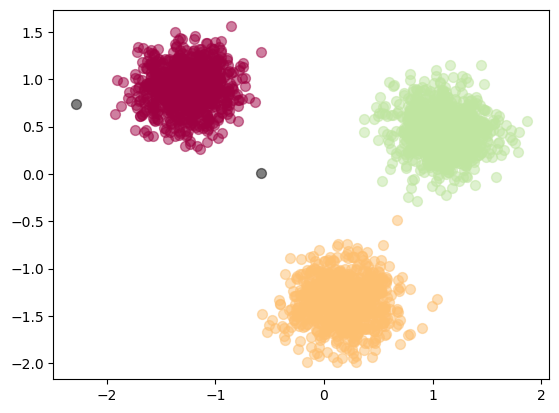

In [33]:
# Plot the points with colors

for k, col in zip(unique_labels, colors):
    
    if k == -1:
    
        # Black used for noise.
        
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    
    xy = X[class_member_mask & core_samples_mask]
    
    #scatter(): A scatter plot of first data vs. second data  with varying marker size and/or color, and The alpha blending value, between 0 (transparent) and 1 (opaque).

    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    
    xy = X[class_member_mask & ~core_samples_mask]
    
    #scatter(): A scatter plot of first data vs. second data  with varying marker size and/or color, and The alpha blending value, between 0 (transparent) and 1 (opaque).

    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)